In [43]:
# imports
import scipy
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn_image as isns
import seaborn as sns
import sklearn
import sklearn.neighbors
import sklearn.metrics

%matplotlib ipympl
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
plt.close('all')

In [34]:
# labels are 0 1 where 1 is anomaly. Feature 1 is an integer. Other features are continuos
thyroid_data = pd.read_csv('thyroid.csv') 

In [36]:
thyroid_data_columns = thyroid_data.columns
thyroid_features = thyroid_data[thyroid_data_columns[:5]]
thyroid_labels = thyroid_data[thyroid_data_columns[6]]

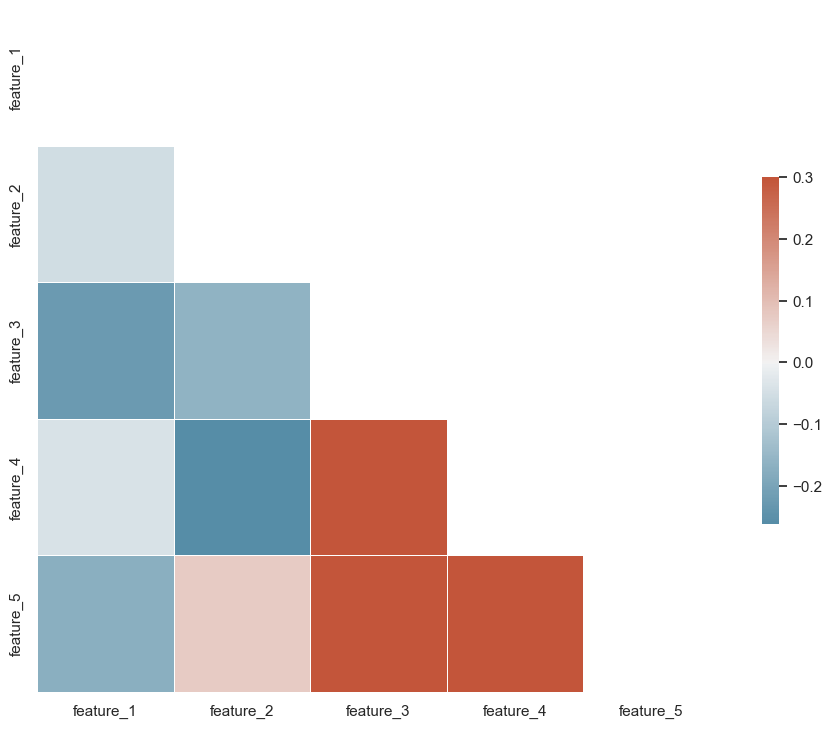

In [37]:
#fig, ax = plt.subplots()  

#correlation between features
sns.set_theme(style="white")
# Compute the correlation matrix
corr = thyroid_features.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

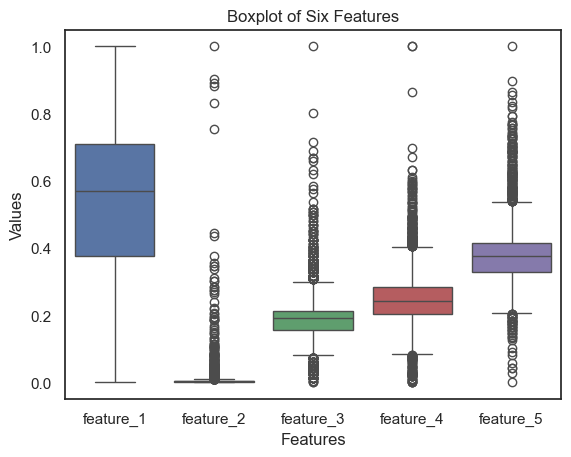

In [38]:
fig, ax = plt.subplots()  

sns.boxplot(data=thyroid_features, ax=ax)
plt.title('Boxplot of Six Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [78]:
clf = sklearn.neighbors.LocalOutlierFactor(n_neighbors=80)
LOF_predictions = clf.fit_predict(thyroid_features)

# change prediction labels so they fit with labels in dataset
LOF_predictions = np.where(LOF_predictions == -1, 1, np.where(LOF_predictions == 1, 0, LOF_predictions))

In [79]:
# accuracy using precision recall area under curve
sklearn.metrics.average_precision_score(thyroid_labels, LOF_predictions)

0.1937926061090536

In [80]:
# f1 for sanity (i know how to use it)
sklearn.metrics.f1_score(thyroid_labels, LOF_predictions, average='binary')
# seems like LOF is actually really bad for this?

0.3677581863979849